# FIT 5196 - Assignment 4
### Group 026
### Group member 1: Keerthana Muralitharan, Student Number: 30159474
### Group member 2: Tony Jose Soosai Manickam, Student Number: 30241065

Date: 27-10-2019

Version: 3.0

Environment: Python 3 and Jupyter Notebook

## Task 1 - Data Integration 

To integrate the given dataset to required schema 

### Importing packages and libraries

Libraries Used: 
- pandas  (for data frame, included in Anaconda Python 3.6)
- re  (for regular expression, included in Anaconda Python 3.6)
- math (for mathematical expressions, included in Anaconda Python 3.6)
- shapefile(for reading and manipulating shapefile, included in Anaconda Python 3.6)
- numpy( for mathematical operations, inlcuded in Anaconda Python 3.6)
- matplotlib ( for plotting graphs and fetching coordinates in the graph, included in Anaconda Python 3.6)
- os( for performing OS related tasks, included in Anaconda Python 3.6)
- requests( for HTTP realted tasks, included in Anaconda Python 3.6)
- Zipfile (for unziping the zip files, included in Anaconda Python 3.6)
- xml.etree( parsing the xml files,included in Anaconda Python 3.6)
- urllib (processing the web links-webscraping,included in Anaconda Python 3.6)
- sklearn( for buiding the linear models and preprocessing the data, included in Anaconda Python 3.6)
- seaborn( for plotting, included in Ananconda Python 3.6)
- Beautifulsoup( for webscraping, included in Anaconda Python 3.6)

In [1]:
import pandas as pd
import math
from math import sin, cos, sqrt, radians, asin, isnan, atan2
import re
#!pip install pyshp
import shapefile
import numpy
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import os
import requests
from zipfile import ZipFile
#!pip install beautifulsoup4
from xml.etree import ElementTree
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Reading the input file

Using pandas the main csv file named "Group026.csv" is read and this file and dropped the duplicate values and found that after droppping the duplicate values we have <b>684</b> rows and <b>12</b> columns, those 12 values are listed below using the info() function.

In [2]:
bigdata=pd.read_csv('Group026.csv')

In [3]:
bigdata.drop_duplicates(inplace=True)
bigdata.reset_index(inplace=True,drop=True)

In [4]:
bigdata.shape

(684, 12)

In [5]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 12 columns):
ID            684 non-null object
Address       684 non-null object
Rooms         684 non-null int64
Type          684 non-null object
Price         684 non-null float64
Date          684 non-null object
Bathroom      684 non-null float64
Car           684 non-null float64
Landsize      684 non-null float64
Age           684 non-null float64
Lattitude     684 non-null float64
Longtitude    684 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 64.2+ KB


In [6]:
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID737166057,17 View St,3,h,3725000.0,13/05/2017,2.0,2.0,857.0,139.0,-37.8203,145.0785
1,ID332105178,53 Purtell St,3,h,1307000.0,13/08/2016,2.0,4.0,684.0,69.0,-37.9260,145.0551
2,ID133555979,32 Matthews St,3,h,950000.0,3/12/2016,1.0,1.0,700.0,59.0,-37.7933,144.8411
3,ID191896891,83 Cardigan St,2,h,840000.0,8/10/2016,1.0,0.0,66.0,119.0,-37.8049,144.9644
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,3/09/2016,2.0,2.0,1170.0,89.0,-37.8831,144.9801


### Finding the suburb
- The zip file is unzipped using ZipFile package and extracted all the contents in the folder created.
- The shapefile is loaded from the <b>VIC_SUBURB_BOUNDARY.ZIP</b> folder and using the "Reader()" the shapefile is read and size of records and type of the shapes are being printed

The shapefile is in fact a grouping of several files formatted to represent different aspects of geodata:
- .shp — shape format; the feature geometry itself.
- .shx — shape index format; a positional index of the feature geometry to allow seeking forwards and backwards quickly.
- .dbf — attribute format; columnar attributes for each shape, in dBase IV format.

In [7]:
with ZipFile(file='vic_suburb_boundary.zip', mode='r') as vic_suburb:
    try:
        #creating a folder to extract the contents
        os.mkdir(path="vic_suburb_boundary",mode=777)
        vic_suburb.extractall(path="vic_suburb_boundary")
    except NameError as e:
        pass
    except FileExistsError as e:
        print('vic_suburb_boundary file already exists')

vic_suburb_boundary file already exists


- On reading the shapefile we have 2973 shapes of polygon type and 2973 records split in 13 fields

In [8]:
#Reading the shape file
shapef = shapefile.Reader("vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp")
print(shapef)

shapefile Reader
    2973 shapes (type 'POLYGON')
    2973 records (13 fields)


In [9]:
#extracting the records and shapes from the shapefile object
recs = shapef.records()
shapes = shapef.shapes()
#print(len(recs),len(shapes))

 - Polygons are created from the list of arrays containing list of latitude and longitude as its coordinate values

In [10]:
#creating empty lists for storing the latitude and longitude coordinates and corresponding suburb names
ptchs   = []
suburb_names = []
#extracting the points and parts from the shape
for nshp in range(len(shapes)):
    pts     = numpy.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
#converting to points to Polygon
    for latlon in range(len(prt)):
        ptchs.append(Polygon(pts[par[latlon]:par[latlon+1]]))
        suburb_names.append(recs[nshp][6])

- A function is defined for getting the exact suburb name , where each property's latitude, longitude is present in the developed polygon using contains_point function.

In [11]:
def get_suburb(row):
    lng = float(row['Longtitude'])
    lat = float(row['Lattitude'])
#returning the suburb name based on the latitude and longitude values
    for i in range(len(ptchs)):
        if ptchs[i].contains_point((lng,lat)) == True:
            return suburb_names[i]

- Function is called for updating Suburb to the main dataframe

In [12]:
#adding the suburb field to the main dataframe
bigdata['Suburb'] = bigdata.apply(get_suburb,axis=1)

In [13]:
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
0,ID737166057,17 View St,3,h,3725000.0,13/05/2017,2.0,2.0,857.0,139.0,-37.8203,145.0785,CANTERBURY
1,ID332105178,53 Purtell St,3,h,1307000.0,13/08/2016,2.0,4.0,684.0,69.0,-37.9260,145.0551,BENTLEIGH EAST
2,ID133555979,32 Matthews St,3,h,950000.0,3/12/2016,1.0,1.0,700.0,59.0,-37.7933,144.8411,SUNSHINE
3,ID191896891,83 Cardigan St,2,h,840000.0,8/10/2016,1.0,0.0,66.0,119.0,-37.8049,144.9644,CARLTON
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,3/09/2016,2.0,2.0,1170.0,89.0,-37.8831,144.9801,ELWOOD


In [14]:
# after adding the suburb we could see a change from 12 columns to 13 columns
bigdata.shape

(684, 13)

- The victorian map is plotted using the given shapefile co-ordinates and each property is being filled with different colors

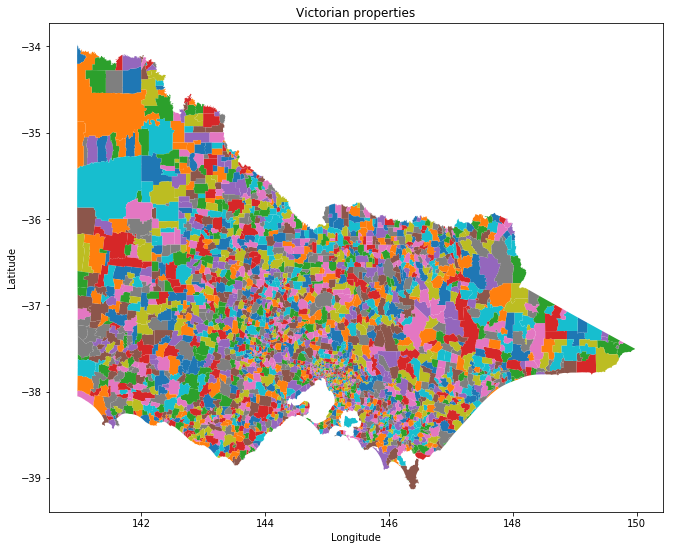

In [15]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.fill(x, y)
        
        if (x_lim == None) & (y_lim == None):
            x0 = numpy.mean(x)
            y0 = numpy.mean(y)
            #plt.text(x0, y0, id, fontsize=10)
        id = id+1
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Victorian properties")
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
plot_map(shapef)

### Finding train station ID, Distance and travel_time
- At first the gtfs zip file is unzipped and the data inside is being extracted , it has a sub directory which is also a zip file so a for loop is written in order to extract all the files in the subdirectories.

In [16]:
path="gtfs"
try:
    # a folder is created to extract all the contents inside the zip file
    os.mkdir(path="gtfs",mode=777)
    with ZipFile("gtfs.zip") as gtfs:
        gtfs.extractall(path=path)
        for x in os.listdir(path):
            temp=os.path.join(path,x)
            subdir = os.listdir(temp)[0]
            ZipFile(os.path.join(temp,subdir)).extractall(path=temp)
            os.remove(os.path.join(temp,subdir))
except NameError as e:
    pass
except FileExistsError as e:
    print("The gtfs directory exists")

The gtfs directory exists


- Files inside folder <b>1</b> and <b>2</b> are only considered as it only coresponds to regional and metropolitan trains respectively.
- Each file in the folders are then appeneded and merged to a separate dataframe for each text file in the folders

In [17]:
# creating empty dataframes for capturing information from routes,trips,stops,stoptimes and calendar data files.
routes=pd.DataFrame()
calendar=pd.DataFrame()
stops=pd.DataFrame()
stoptimes=pd.DataFrame()
trips=pd.DataFrame()

# using the os package each file is read and concatenated into the dataframe.
for directories in os.listdir(path):
    if directories=='1' or directories=='2':
        for k,v in enumerate(os.listdir(os.path.join(path,directories))):
            path1=os.path.join(path,directories,v)
            if v=='trips.txt':
                trip_data=pd.read_csv(path1)
                trips=pd.concat([trips,trip_data])
            elif v=='routes.txt':
                route_data=pd.read_csv(path1)
                routes=pd.concat([routes,route_data])
            elif v=='calendar.txt':
                calendar_data=pd.read_csv(path1)
                calendar=pd.concat([calendar,calendar_data])
            elif v=='stops.txt':
                stops_data=pd.read_csv(path1)
                stops=pd.concat([stops,stops_data])
            elif v=='stop_times.txt':
                stoptimes_data=pd.read_csv(path1)
                stoptimes=pd.concat([stoptimes,stoptimes_data])


In [18]:
# display the trips dataframe
trips.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1


In [19]:
# display the routes dataframe
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,1-V08-A-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
1,1-V08-B-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
2,1-V08-C-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
3,1-V08-D-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF
4,1-V08-E-mjp-1,NaN,NaN,Bairnsdale - Melbourne Via Sale & Traralgon,2,8F1A95,FFFFFF


In [20]:
# display the stops dataframe
stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


In [21]:
# display the stoptime dataframe
stoptimes.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301


In [22]:
# display the calendar dataframe
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,UR,0,0,0,1,0,0,0,20190509,20190509
1,T6,0,0,0,0,1,0,0,20190510,20190510
2,T2,0,0,0,0,0,1,0,20190511,20190511
3,UJ,0,0,0,0,0,0,1,20190512,20190512
4,UO,1,0,0,0,0,0,0,20190513,20190513


- Based on the common stop id the stoptimes is merged with the stop dataframe and it is inturn merged with the trips dataframe based on the common trip_id.Unwanted fields are dropped from the main dataframe <b>train</b> which is ready for the processing

In [23]:
stop_details = stoptimes.merge(stops, on='stop_id')
train = stop_details.merge(trips, on="trip_id")
#print(train.head())
train=train.drop(labels=['stop_headsign','pickup_type','drop_off_type','shape_dist_traveled','shape_id'],axis=1)
train.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,route_id,service_id,trip_headsign,direction_id
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,Bairnsdale Railway Station (Bairnsdale),-37.828720,147.627614,1-V08-A-mjp-1,UR,Melbourne,0
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,Stratford Railway Station (Stratford),-37.967047,147.081469,1-V08-A-mjp-1,UR,Melbourne,0
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,Sale Railway Station (Sale),-38.103103,147.054805,1-V08-A-mjp-1,UR,Melbourne,0
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,Rosedale Railway Station (Rosedale),-38.156404,146.786966,1-V08-A-mjp-1,UR,Melbourne,0
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,Traralgon Railway Station (Traralgon),-38.198885,146.537882,1-V08-A-mjp-1,UR,Melbourne,0


##### Train_station_id
- The closest train station to the property that has a direct trip to the Southern Cross Railway Station. A direct trip is a trip where there are no connections (transfers) in the trip from the origin to the destination. Default value: -1 

##### distance_to_train_station
- The direct distance from the closest train station (identified above) to the property. Default value: -1

##### travel_min_to_CBD
- The average travel time (minutes) from the closest train station (regional/metropolitan) that has a direct trip to the “Southern Cross Railway Station” on weekdays (i.e. Monday-Friday) departing between 7 to 9:30 am. For example, if there are 3 direct trips departing from the closest train station to the Southern Cross Railway Station on weekdays between 7-9:30 am and each takes 6, 7, and 8 minutes respectively, then the value of this column for the property should be (6+7+8)/3.). Default value: -1

##### To find the above columns 
- First the trains which are runin on weekdays alone is filtered and those service ids are alone fetched.If the train runs on all the 5 weekdays it is extracted and added to a new dataframe.
- The time of the trip is found using the regular expressions and it is beeing grouped into 3 groups - hours,minutes and seconds.
- Using the above function to fetch the time in hours minutes and seconds we will find the arrival and departure time
- Based on the stopsequence the departure time is considered.

In [24]:
#Filtering only the weekdays
daily_services = calendar[(calendar.monday != 0)&(calendar.tuesday != 0)&(calendar.wednesday != 0)&(calendar.thursday != 0)&(calendar.friday != 0)].service_id.values
#Checking with the main traindataframe and considering only the weekday trains
daily_service_details = train[train.service_id.isin(daily_services)].reset_index(drop=True)
#https://stackoverflow.com/questions/28504494/python-is-not-none-returning-none
#Function to find the hours,minutes and seconds in the time
def time_fix(x):
    data = re.search(pattern=r'(\d{2}):(\d{2}):(\d{2})', string=x)
    hours, minutes, seconds = data.groups() if data is not None else None
    if int(hours)>=24:
        hours = int(hours) - 24
    return str(hours)+':'+minutes+':'+seconds
#The arrival and departure time is fixed using the  
daily_service_details['arrival_time'] = daily_service_details[['arrival_time']].apply(lambda x: time_fix(x['arrival_time']),axis=1)
daily_service_details['departure_time'] = daily_service_details[['departure_time']].apply(lambda x: time_fix(x['departure_time']),axis=1)
daily_service_details.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,route_id,service_id,trip_headsign,direction_id
0,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,Bairnsdale Railway Station (Bairnsdale),-37.828720,147.627614,1-V08-G-mjp-1,T0,Melbourne,0
1,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,Stratford Railway Station (Stratford),-37.967047,147.081469,1-V08-G-mjp-1,T0,Melbourne,0
2,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,Sale Railway Station (Sale),-38.103103,147.054805,1-V08-G-mjp-1,T0,Melbourne,0
3,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,Rosedale Railway Station (Rosedale),-38.156404,146.786966,1-V08-G-mjp-1,T0,Melbourne,0
4,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,Traralgon Railway Station (Traralgon),-38.198885,146.537882,1-V08-G-mjp-1,T0,Melbourne,0


- The train stations id having southern cross is filtered and kept in a set and the stations not southern cross is kept in another set from the train dataframe.


In [25]:
#Station id of southern cross and not southeren cross is filtered in 2 diffrent sets.
southern_cross_stopids = set(daily_service_details[daily_service_details.stop_name == 'Southern Cross Railway Station (Melbourne City)'].stop_id)
non_southern_cross_stopids = set(daily_service_details.stop_id) - southern_cross_stopids
print('Station id of SOuthern cross railway station: ', southern_cross_stopids)

Station id of SOuthern cross railway station:  {20043, 22180}


- the services which is having the stopname as the southern cross is filtered and that of not southern cross is also stored in a separate dataframe.

In [26]:
southern_cross_stops_df = daily_service_details[daily_service_details.stop_id.isin(southern_cross_stopids)]
non_southern_cross_stops_df = daily_service_details[daily_service_details.stop_id.isin(non_southern_cross_stopids)]
southern_cross_stops_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,route_id,service_id,trip_headsign,direction_id
15,1051.T0.1-V08-G-mjp-1.1.H,09:57:00,09:57:00,20043,23,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525,1-V08-G-mjp-1,T0,Melbourne,0
30,1052.T0.1-V08-G-mjp-1.2.H,16:35:00,16:35:00,20043,23,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525,1-V08-G-mjp-1,T0,Melbourne,0
45,1053.T0.1-V08-G-mjp-1.2.H,22:08:00,22:08:00,20043,23,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525,1-V08-G-mjp-1,T0,Melbourne,0
60,1522.T0.1-V08-G-mjp-1.4.R,07:20:00,07:20:00,20043,1,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525,1-V08-G-mjp-1,T0,Bairnsdale,1
76,1523.T0.1-V08-G-mjp-1.5.R,13:20:00,13:20:00,20043,1,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525,1-V08-G-mjp-1,T0,Bairnsdale,1


- Departure time is changed to datetime format
- the trains which are running between 7am to 9:30am is filtered and stored in service_between_7_930 dataframe.
- the trips which are going to southerncross in the time between 7am to 9:30 am are both combined to the train_final dataframe

In [27]:
#Converting to datetime format
departure_time_index = pd.DatetimeIndex(non_southern_cross_stops_df['departure_time'])

#filtering the trips betwwen 7am to 9:30 am
service_between_7930 = non_southern_cross_stops_df.iloc[(departure_time_index.indexer_between_time('07:00:00','09:30:00'))]

#finding all the trips betwwn 7am to 9:30am and going to southern cross directly is stored
southern_cross_trip_ids = set(daily_service_details[daily_service_details.stop_id.isin(southern_cross_stopids)].trip_id)
services_running_to_southern_cross = service_between_7930[service_between_7930.trip_id.isin(southern_cross_trip_ids)]
trains_final = pd.concat([services_running_to_southern_cross, southern_cross_stops_df]).reset_index(drop=True)
trains_final.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon,route_id,service_id,trip_headsign,direction_id
0,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,Rosedale Railway Station (Rosedale),-38.156404,146.786966,1-V08-G-mjp-1,T0,Melbourne,0
1,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,Traralgon Railway Station (Traralgon),-38.198885,146.537882,1-V08-G-mjp-1,T0,Melbourne,0
2,1051.T0.1-V08-G-mjp-1.1.H,07:45:00,07:45:00,20330,6,Morwell Railway Station (Morwell),-38.236719,146.396753,1-V08-G-mjp-1,T0,Melbourne,0
3,1051.T0.1-V08-G-mjp-1.1.H,07:57:00,07:57:00,20328,7,Moe Railway Station (Moe),-38.176715,146.262697,1-V08-G-mjp-1,T0,Melbourne,0
4,1051.T0.1-V08-G-mjp-1.1.H,08:16:00,08:16:00,20357,10,Warragul Railway Station (Warragul),-38.165224,145.933085,1-V08-G-mjp-1,T0,Melbourne,0


- given the radius of earth is 6378 km, using this information we find the distance between the station and the property using the latitude and longitude of the two places which has direct trip to the southern cross.

In [28]:
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

train_station_coordinates = trains_final[['stop_lat', 'stop_lon']].values.tolist()
radius_earth=6378.0 #kms

# function to calculate the distance between the station and property which has direct trip to southerncross
def suburb_station_id(x):
    min_dist = []
    lambda1, theta1 = radians(x['Longtitude']), radians(x['Lattitude'])
    for lat, lon in train_station_coordinates:
        lambda2, theta2 = radians(lon) , radians(lat) 
        lambd = lambda1 - lambda2
        thet = theta1 - theta2
        temp = sin(thet / 2)**2 + cos(theta1) * cos(theta2) * sin(lambd / 2)**2
        result = 2 * radius_earth * atan2(sqrt(temp), sqrt(1 - temp))
        min_dist.append(result)
    return trains_final.iloc[min_dist.index(min(min_dist))].stop_id, round(min(min_dist) * 1000, 2), trains_final.iloc[min_dist.index(min(min_dist))].stop_name

- the train station, its id and the distance is added to the main bigdata dataframe by calling the function and passing the latitude and longitude.

In [29]:
#https://stackoverflow.com/questions/42973256/apply-zip-function-on-pandas-dataframe-using-a-for-loop-argument
bigdata['train_station_id'], bigdata['distance_to_train_station'], bigdata['train_station'] = zip(*bigdata[['Longtitude', 'Lattitude']].apply(lambda x:suburb_station_id(x), axis=1))

In [30]:
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,train_station
0,ID737166057,17 View St,3,h,3725000.0,13/05/2017,2.0,2.0,857.0,139.0,-37.8203,145.0785,CANTERBURY,19893,523.86,Canterbury Railway Station (Canterbury)
1,ID332105178,53 Purtell St,3,h,1307000.0,13/08/2016,2.0,4.0,684.0,69.0,-37.9260,145.0551,BENTLEIGH EAST,19938,1726.27,Patterson Railway Station (Bentleigh)
2,ID133555979,32 Matthews St,3,h,950000.0,3/12/2016,1.0,1.0,700.0,59.0,-37.7933,144.8411,SUNSHINE,22241,896.83,Sunshine Railway Station (Sunshine)
3,ID191896891,83 Cardigan St,2,h,840000.0,8/10/2016,1.0,0.0,66.0,119.0,-37.8049,144.9644,CARLTON,19842,582.97,Melbourne Central Railway Station (Melbourne C...
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,3/09/2016,2.0,2.0,1170.0,89.0,-37.8831,144.9801,ELWOOD,19955,1552.41,Ripponlea Railway Station (Ripponlea)


- The arrival and departure time of the trains is converted into datetime object.

In [31]:
#converting the departure andarrival time into datetime object.
trains_final['departure_time'] = pd.DatetimeIndex(trains_final['departure_time'])
trains_final['arrival_time'] = pd.DatetimeIndex(trains_final['arrival_time'])

- since the distance and train station is updated to the main dataframe, the station ids which belongs to weekdays and between 7-9:30am is verified and stored in train_final

In [32]:
# verification and adding the values to the trains_final dataframe
for i in bigdata.train_station_id:
    trains_final[(trains_final.stop_id == i)]

- the minimum time to reach CBD is calculated is the values are present in the starting tripids set , the departure and arrival time is calculated and the difference is found and the average of them is given in minutes

In [33]:
def time_to_cbd(row):
    start_tripid = set(trains_final[trains_final.stop_id == row['train_station_id']].trip_id)
    end_tripid = set(trains_final[trains_final.stop_id.isin(southern_cross_stopids)].trip_id)
    trip_time = []
    # departure and arrival time is calculated and average is returned in the function
    for i in start_tripid:
        departure_time = trains_final[(trains_final.trip_id == i ) & (trains_final.stop_id == row['train_station_id'])].departure_time.values
        arrival_time = trains_final[(trains_final.trip_id == i ) & (trains_final.stop_id.isin(southern_cross_stopids))].arrival_time.values
        diff_time = (departure_time - arrival_time).astype('timedelta64[m]') / numpy.timedelta64(1, 'm')
        trip_time.append(abs(diff_time[0]))
    return numpy.average(trip_time)

In [34]:
#the minimum travel time is found using the function call
bigdata['travel_min_to_CBD'] = bigdata[['train_station_id']].apply(lambda x: time_to_cbd(x), axis = 1)

In [35]:
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,train_station,travel_min_to_CBD
0,ID737166057,17 View St,3,h,3725000.0,13/05/2017,2.0,2.0,857.0,139.0,-37.8203,145.0785,CANTERBURY,19893,523.86,Canterbury Railway Station (Canterbury),23.789474
1,ID332105178,53 Purtell St,3,h,1307000.0,13/08/2016,2.0,4.0,684.0,69.0,-37.9260,145.0551,BENTLEIGH EAST,19938,1726.27,Patterson Railway Station (Bentleigh),35.689655
2,ID133555979,32 Matthews St,3,h,950000.0,3/12/2016,1.0,1.0,700.0,59.0,-37.7933,144.8411,SUNSHINE,22241,896.83,Sunshine Railway Station (Sunshine),14.516129
3,ID191896891,83 Cardigan St,2,h,840000.0,8/10/2016,1.0,0.0,66.0,119.0,-37.8049,144.9644,CARLTON,19842,582.97,Melbourne Central Railway Station (Melbourne C...,4.542510
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,3/09/2016,2.0,2.0,1170.0,89.0,-37.8831,144.9801,ELWOOD,19955,1552.41,Ripponlea Railway Station (Ripponlea),21.333333


### Over priced
- A boolean feature indicating whether or not the price of the property is higher than the median price of similar properties (with respect to bedrooms, bathrooms, parking_space, and property_type attributes) in the same suburb on the year of selling.


In [36]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 17 columns):
ID                           684 non-null object
Address                      684 non-null object
Rooms                        684 non-null int64
Type                         684 non-null object
Price                        684 non-null float64
Date                         684 non-null object
Bathroom                     684 non-null float64
Car                          684 non-null float64
Landsize                     684 non-null float64
Age                          684 non-null float64
Lattitude                    684 non-null float64
Longtitude                   684 non-null float64
Suburb                       684 non-null object
train_station_id             684 non-null int64
distance_to_train_station    684 non-null float64
train_station                684 non-null object
travel_min_to_CBD            684 non-null float64
dtypes: float64(9), int64(2), object(6)
memory usage: 9

- To find if it is overpriced or not we need to extract the year with the features like rooms ,type,price , car park space and also the suburb.
- we convert the date column datatype from object to datetime

In [37]:
# Converting the datatype of the Date column inorder to extract the year
bigdata['Date'] = pd.to_datetime(bigdata['Date'])
bigdata['Year'] = bigdata['Date'].dt.year

# Extracting the required columns to find median
price_data = bigdata[['Rooms', 'Type', 'Price', 'Year', 'Bathroom', 'Car', 'Suburb']]

# Grouping by attributes and calculating the median using numpy
price_data = price_data.groupby(['Rooms', 'Type', 'Year', 'Bathroom', 'Car', 'Suburb']).agg({'Price':numpy.median}).reset_index()

price_data.head()

,Rooms,Type,Year,Bathroom,Car,Suburb,Price
0,1,h,2017,1.0,0.0,NEWPORT,1700000.0
1,1,t,2017,1.0,1.0,MURRUMBEENA,470000.0
2,1,u,2016,1.0,1.0,ALBION,185000.0
3,1,u,2016,1.0,1.0,CARNEGIE,364000.0
4,1,u,2016,1.0,1.0,FOOTSCRAY,275000.0


- the median price data and the bigdata is merged to do the comparison to find whether it is overpriced or not ?

In [38]:
# Merging the datasets with price 
new_data = pd.merge(bigdata, price_data, how='left', left_on=['Rooms', 'Type', 'Year', 'Bathroom', 'Car', 'Suburb'], right_on=['Rooms', 'Type', 'Year', 'Bathroom', 'Car', 'Suburb'],
         right_index=False)

new_data.head()

,ID,Address,Rooms,Type,Price_x,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,train_station,travel_min_to_CBD,Year,Price_y
0,ID737166057,17 View St,3,h,3725000.0,2017-05-13,2.0,2.0,857.0,139.0,-37.8203,145.0785,CANTERBURY,19893,523.86,Canterbury Railway Station (Canterbury),23.789474,2017,3725000.0
1,ID332105178,53 Purtell St,3,h,1307000.0,2016-08-13,2.0,4.0,684.0,69.0,-37.9260,145.0551,BENTLEIGH EAST,19938,1726.27,Patterson Railway Station (Bentleigh),35.689655,2016,1307000.0
2,ID133555979,32 Matthews St,3,h,950000.0,2016-03-12,1.0,1.0,700.0,59.0,-37.7933,144.8411,SUNSHINE,22241,896.83,Sunshine Railway Station (Sunshine),14.516129,2016,950000.0
3,ID191896891,83 Cardigan St,2,h,840000.0,2016-08-10,1.0,0.0,66.0,119.0,-37.8049,144.9644,CARLTON,19842,582.97,Melbourne Central Railway Station (Melbourne C...,4.542510,2016,978500.0
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,2016-03-09,2.0,2.0,1170.0,89.0,-37.8831,144.9801,ELWOOD,19955,1552.41,Ripponlea Railway Station (Ripponlea),21.333333,2016,1350000.0


- If the price is higher than the median price its condition is <b>True</b> and it is denoted as <b>1</b>
- If the price is lesser than the median price its condition is <b>False</b> and it is denoted as <b>0</b>

In [39]:
# Creating a boolean column over_priced? indicating whether or not the price of the property is higher than the median price of similar properties in its suburb
new_data['over_priced?'] = numpy.where(new_data.Price_x > new_data.Price_y, 1, 0)

In [40]:
# Renaming and selecting required columns and deleting the mean value price
bigdata = new_data.rename(columns={'Price_x': 'Price'})
del bigdata['Price_y']
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,train_station,travel_min_to_CBD,Year,over_priced?
0,ID737166057,17 View St,3,h,3725000.0,2017-05-13,2.0,2.0,857.0,139.0,-37.8203,145.0785,CANTERBURY,19893,523.86,Canterbury Railway Station (Canterbury),23.789474,2017,0
1,ID332105178,53 Purtell St,3,h,1307000.0,2016-08-13,2.0,4.0,684.0,69.0,-37.9260,145.0551,BENTLEIGH EAST,19938,1726.27,Patterson Railway Station (Bentleigh),35.689655,2016,0
2,ID133555979,32 Matthews St,3,h,950000.0,2016-03-12,1.0,1.0,700.0,59.0,-37.7933,144.8411,SUNSHINE,22241,896.83,Sunshine Railway Station (Sunshine),14.516129,2016,0
3,ID191896891,83 Cardigan St,2,h,840000.0,2016-08-10,1.0,0.0,66.0,119.0,-37.8049,144.9644,CARLTON,19842,582.97,Melbourne Central Railway Station (Melbourne C...,4.542510,2016,0
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,2016-03-09,2.0,2.0,1170.0,89.0,-37.8831,144.9801,ELWOOD,19955,1552.41,Ripponlea Railway Station (Ripponlea),21.333333,2016,0


#### Crime Average

- The average of type A,B and C crime in the local government area the property belongs to, in the three years prior to selling the property as the property. For example, if a property is sold in 2016, then you should calculate the average of the crime type A for 2013, 2014 and 2015. Default value: -1

- the excel file is read and the Table 1 sheet is consireded removing the unnamed_0 sheet in the crime excel document


In [41]:
excel_file = pd.ExcelFile('crimebylocationdatatable-yearending31march2016.xlsx')

# Loading "Table 1" sheet into a df
crimes_loc_yr = excel_file.parse('Table 1')

# Deleting unwanted rows and columns and creating a dataframe
del crimes_loc_yr['Unnamed: 0']
crimes_loc_yr = crimes_loc_yr.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
col_names = crimes_loc_yr.iloc[[0]].values.flatten().tolist()
crimes_loc_yr = crimes_loc_yr.drop(17)
crimes_loc_yr.columns = col_names
crimes_loc_yr.reset_index()
crimes_loc_yr.head()

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
18,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
22,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521


- The number of the offence count per local overnment area is bein filtered per year.

In [42]:
# Obtaining offence count of each Local Government Area for each Year
crimes_loc_yr = crimes_loc_yr.rename(columns={'Apr - Mar reference period': 'Year'})
crimes_loc_yr['Offence_type'] = crimes_loc_yr['CSA Offence Division'].str[:1]
crimes_loc_yr = crimes_loc_yr.groupby(['Year', 'Local Government Area', 'Offence_type']).agg({'Offence Count':numpy.sum}).reset_index()
convert_dict1 = {'Year': 'int64'}
crimes_loc_yr = crimes_loc_yr.astype(convert_dict1) 
crimes_loc_yr.head()

,Year,Local Government Area,Offence_type,Offence Count
0,2012,ALPINE,A,72
1,2012,ALPINE,B,227
2,2012,ALPINE,C,37
3,2012,ALPINE,D,76
4,2012,ALPINE,E,38


- the suburbs coming under each local government area is converted to a dictionary.

In [43]:
# Reading the councils file and converting to a list
file_councils = open("councils.txt","r") 
content = file_councils.readlines()
content_list = [x.strip() for x in content]
len(content_list)

# Converting the list into a dictionary
councils_dict = {}
for i in content_list:
    val_final = []
    key_list = re.findall(r'(.*) : .*', i)
    key = key_list[0]
    val = re.findall(r'[A-Z]* : \[(.*)\]', i)
    val = [x.split(", ") for x in val]
    #the suburbs are mapped with the local government area as keys.
    for i in val:
        for k in i:
            j = k[1:-1]
            val_final.append(j.upper())
    councils_dict[key] = val_final


- Mapping each suburb to its local government area

In [44]:
# Finding local Government Area based on suburb
lga_list = []
for i, r in bigdata.iterrows():
    suburb = r['Suburb']
    for i in councils_dict:
        if suburb in councils_dict[i]:
            lga = i
    lga_list.append(lga)
# local government area added to the bigdata dataframe
bigdata['LocalGovernmentArea'] = lga_list

In [45]:
# Crime A
# Filtering for crime type A
crime_A = crimes_loc_yr[crimes_loc_yr['Offence_type'] == 'A']

- Average crime rate for type A is calculated for a periodof 3 pervious years

In [46]:
# Finding average crime for three years prior to sale and in the same local government area
avg_crime_list = []
for i, r in bigdata.iterrows():
    # Setting the default value
    avg_crime = -1
    house_lga = r['LocalGovernmentArea']
    yr = int(r['Year']) 
    yr_3 = yr - 3 
    yr_1 = yr - 1 
    filtered_df = crime_A[(crime_A['Local Government Area'] == house_lga) & (crime_A['Year'] >= yr_3) & (crime_A['Year'] <= yr_1)]
    avg_crime = filtered_df["Offence Count"].mean()
    avg_crime_list.append(avg_crime)

In [47]:
# addin to the main bigdata dataframe
bigdata['crime_A_average'] = avg_crime_list 
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Longtitude,Suburb,train_station_id,distance_to_train_station,train_station,travel_min_to_CBD,Year,over_priced?,LocalGovernmentArea,crime_A_average
0,ID737166057,17 View St,3,h,3725000.0,2017-05-13,2.0,2.0,857.0,139.0,...,145.0785,CANTERBURY,19893,523.86,Canterbury Railway Station (Canterbury),23.789474,2017,0,MELBOURNE,3767.666667
1,ID332105178,53 Purtell St,3,h,1307000.0,2016-08-13,2.0,4.0,684.0,69.0,...,145.0551,BENTLEIGH EAST,19938,1726.27,Patterson Railway Station (Bentleigh),35.689655,2016,0,HOBSONS BAY,925.666667
2,ID133555979,32 Matthews St,3,h,950000.0,2016-03-12,1.0,1.0,700.0,59.0,...,144.8411,SUNSHINE,22241,896.83,Sunshine Railway Station (Sunshine),14.516129,2016,0,KNOX,1363.666667
3,ID191896891,83 Cardigan St,2,h,840000.0,2016-08-10,1.0,0.0,66.0,119.0,...,144.9644,CARLTON,19842,582.97,Melbourne Central Railway Station (Melbourne C...,4.542510,2016,0,STRATHBOGIE,97.666667
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,2016-03-09,2.0,2.0,1170.0,89.0,...,144.9801,ELWOOD,19955,1552.41,Ripponlea Railway Station (Ripponlea),21.333333,2016,0,MORELAND,1566.666667


- - Average crime rate for type B is calculated for a periodof 3 pervious years

In [48]:
### Crime B

# Filtering for crime type B
crime_B = crimes_loc_yr[crimes_loc_yr['Offence_type'] == 'B']
# Finding average crime for three years prior to sale and in the same local government area
avg_crime_list = []
for i, r in bigdata.iterrows():
    # Setting the default value
    avg_crime = -1
    house_lga = r['LocalGovernmentArea']
    yr = int(r['Year']) 
    yr_3 = yr - 3 
    yr_1 = yr - 1 
    filtered_df = crime_B[(crime_B['Local Government Area'] == house_lga) & (crime_B['Year'] >= yr_3) & (crime_B['Year'] <= yr_1)]
    avg_crime = filtered_df["Offence Count"].mean()
    avg_crime_list.append(avg_crime)
    
    

In [49]:
#adding to the main bigdata dataframe
bigdata['crime_B_average'] = avg_crime_list 
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Suburb,train_station_id,distance_to_train_station,train_station,travel_min_to_CBD,Year,over_priced?,LocalGovernmentArea,crime_A_average,crime_B_average
0,ID737166057,17 View St,3,h,3725000.0,2017-05-13,2.0,2.0,857.0,139.0,...,CANTERBURY,19893,523.86,Canterbury Railway Station (Canterbury),23.789474,2017,0,MELBOURNE,3767.666667,18925.000000
1,ID332105178,53 Purtell St,3,h,1307000.0,2016-08-13,2.0,4.0,684.0,69.0,...,BENTLEIGH EAST,19938,1726.27,Patterson Railway Station (Bentleigh),35.689655,2016,0,HOBSONS BAY,925.666667,4701.333333
2,ID133555979,32 Matthews St,3,h,950000.0,2016-03-12,1.0,1.0,700.0,59.0,...,SUNSHINE,22241,896.83,Sunshine Railway Station (Sunshine),14.516129,2016,0,KNOX,1363.666667,6287.666667
3,ID191896891,83 Cardigan St,2,h,840000.0,2016-08-10,1.0,0.0,66.0,119.0,...,CARLTON,19842,582.97,Melbourne Central Railway Station (Melbourne C...,4.542510,2016,0,STRATHBOGIE,97.666667,243.000000
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,2016-03-09,2.0,2.0,1170.0,89.0,...,ELWOOD,19955,1552.41,Ripponlea Railway Station (Ripponlea),21.333333,2016,0,MORELAND,1566.666667,8895.333333


- Average crime rate for type C is calculated for a periodof 3 pervious years

In [50]:
#### Crime Type C
# Filtering for crime type C
crime_C = crimes_loc_yr[crimes_loc_yr['Offence_type'] == 'C']
# Finding average crime for three years prior to sale and in the same local government area
avg_crime_list = []
for i, r in bigdata.iterrows():
    # Setting the default value
    avg_crime = -1
    house_lga = r['LocalGovernmentArea']
    yr = int(r['Year']) 
    yr_3 = yr - 3 
    yr_1 = yr - 1 
    filtered_df = crime_C[(crime_C['Local Government Area'] == house_lga) & (crime_C['Year'] >= yr_3) & (crime_C['Year'] <= yr_1)]
    avg_crime = filtered_df["Offence Count"].mean()
    avg_crime_list.append(avg_crime)

In [51]:
bigdata['crime_C_average'] = avg_crime_list 
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,train_station_id,distance_to_train_station,train_station,travel_min_to_CBD,Year,over_priced?,LocalGovernmentArea,crime_A_average,crime_B_average,crime_C_average
0,ID737166057,17 View St,3,h,3725000.0,2017-05-13,2.0,2.0,857.0,139.0,...,19893,523.86,Canterbury Railway Station (Canterbury),23.789474,2017,0,MELBOURNE,3767.666667,18925.000000,2042.333333
1,ID332105178,53 Purtell St,3,h,1307000.0,2016-08-13,2.0,4.0,684.0,69.0,...,19938,1726.27,Patterson Railway Station (Bentleigh),35.689655,2016,0,HOBSONS BAY,925.666667,4701.333333,308.666667
2,ID133555979,32 Matthews St,3,h,950000.0,2016-03-12,1.0,1.0,700.0,59.0,...,22241,896.83,Sunshine Railway Station (Sunshine),14.516129,2016,0,KNOX,1363.666667,6287.666667,564.333333
3,ID191896891,83 Cardigan St,2,h,840000.0,2016-08-10,1.0,0.0,66.0,119.0,...,19842,582.97,Melbourne Central Railway Station (Melbourne C...,4.542510,2016,0,STRATHBOGIE,97.666667,243.000000,33.000000
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,2016-03-09,2.0,2.0,1170.0,89.0,...,19955,1552.41,Ripponlea Railway Station (Ripponlea),21.333333,2016,0,MORELAND,1566.666667,8895.333333,491.000000


- After adding the crime averages the bigdata dataframe appears like this with 23 columns and 684 rows.

In [52]:
bigdata.shape

(684, 23)

In [53]:
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,train_station_id,distance_to_train_station,train_station,travel_min_to_CBD,Year,over_priced?,LocalGovernmentArea,crime_A_average,crime_B_average,crime_C_average
0,ID737166057,17 View St,3,h,3725000.0,2017-05-13,2.0,2.0,857.0,139.0,...,19893,523.86,Canterbury Railway Station (Canterbury),23.789474,2017,0,MELBOURNE,3767.666667,18925.000000,2042.333333
1,ID332105178,53 Purtell St,3,h,1307000.0,2016-08-13,2.0,4.0,684.0,69.0,...,19938,1726.27,Patterson Railway Station (Bentleigh),35.689655,2016,0,HOBSONS BAY,925.666667,4701.333333,308.666667
2,ID133555979,32 Matthews St,3,h,950000.0,2016-03-12,1.0,1.0,700.0,59.0,...,22241,896.83,Sunshine Railway Station (Sunshine),14.516129,2016,0,KNOX,1363.666667,6287.666667,564.333333
3,ID191896891,83 Cardigan St,2,h,840000.0,2016-08-10,1.0,0.0,66.0,119.0,...,19842,582.97,Melbourne Central Railway Station (Melbourne C...,4.542510,2016,0,STRATHBOGIE,97.666667,243.000000,33.000000
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,2016-03-09,2.0,2.0,1170.0,89.0,...,19955,1552.41,Ripponlea Railway Station (Ripponlea),21.333333,2016,0,MORELAND,1566.666667,8895.333333,491.000000


### Primary and Secondary School distance, rank and name
- To obtain the schools data the xml parser is used to extract the contents from the schools.xml file.
- the extracted data is then converted to a dataframe

In [54]:
#https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c
data = ElementTree.parse('schools.xml').getroot()
schools = []
#parsing the data to fit into pandas dataframe
for elements in data:
    temp = []
    for element in elements:
        temp.append(element.text)
    schools.append(temp)
schools_df = pd.DataFrame(schools)
schools_df.columns = [i.tag for i in data[0]]
schools_df.head()

,Education_Sector,Entity_Type,School_No,School_Name,School_Type,Address_Line_1,Address_Line_2,Address_State,Postal_Address_Line_1,Postal_Address_Line_2,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,21 Thomson Street,None,VIC,21 Thomson Street,None,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,Frank Street,None,VIC,Frank Street,None,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,118 Barnett Street,None,VIC,P O Box 12,None,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,40 Anderson Street,None,VIC,40 Anderson Street,None,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,5-11 Forbes Street,None,VIC,5-11 Forbes Street,None,03 9844 3537,421,Manningham (C),145.21398,-37.742675


##### primary school
- using the Beautifulsoup package the primary school link is opened and the table inside the webpae alone is webscraped.

In [55]:
primary_link ="http://www.schoolcatchment.com.au/?p=12301"
#https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722
site_meta_data = urlopen(primary_link)
soup_obj = BeautifulSoup(site_meta_data, 'lxml')
school_table = soup_obj.find('table')


- the table headers "thead" is fetched into the table_columns, table body "tbody" and table data as "td" is fetched and stored as dataframes.
- these are then concatenated to school_ranking_df to find the ranks

In [56]:
# table header is extracted
table_columns = [i.text for i in school_table.find('thead').find_all()[1:]]
columns_list = []
# table body and table data is extracted and fit into a dataframe
for table in school_table.find_all('tbody', class_='row-hover'):    
    for column in range(1,len(table_columns)+1):
        column_data = table.find_all('td', class_=f"column-{column}")
        column_data = [i.text for i in column_data]
        columns_list.append(pd.Series(column_data, name=table_columns[column-1]))
school_ranking_df = pd.concat(columns_list, axis = 1)

- primary school details obtained from the website is merged with the school dataframe

In [57]:
# primary school ranking information is merged with the schools dataframe fetched from the xml file.
final = schools_df.merge(school_ranking_df.rename(columns={'School Name' : 'School_Name','State' : 'Address_State'}),how='left')

##### secondary school

###### Steps to extract the secondary file
- Chrome webdriver is installed
- the contents of the file is fetched using the find_element_by_xpath
- the monash authcate credentials are provided
- once the ID and password is  verified, the webpage is opened
- the webpage is saved in .html extension and then processed.

###### Code
driver = webdriver.Chrome(ChromeDriverManager().install())<br>
driver = webdriver.Chrome(executable_path=r"C:/Users/Keerthana/.wdm/drivers/chromedriver/78.0.3904.70/win32/chromedriver.exe")<br>
driver.get("https://sites.google.com/a/monash.edu/secondary-school-ranking/")<br>
monash_sign_in = driver.find_element_by_xpath('/html/body/div/div[2]/div[2]/a')<br>
monash_sign_in.click()<br>
<br>
username = driver.find_element_by_id('okta-signin-username')<br>
username.send_keys('kmur0015@student.monash.edu')<br>
<br>
password = driver.find_element_by_id('okta-signin-password')<br>
password.send_keys('************') # provide with the monash password<br>
<br>
sign_in = driver.find_element_by_id('okta-signin-submit')<br>
sign_in.click()<br>
<br>
- Waiting for 15 seconds for the page to load<br>
time.sleep(15)<br>
okta_verify = driver.find_element_by_xpath('//*[@id="form8"]/div[2]/input')<br>
okta_verify.click()<br>
<br>
- Waiting for 1 minute to verify Okta and page to load<br>
time.sleep(60)<br>
verify_3 = driver.find_element_by_xpath('//*[@id="view_container"]/div/div/div[2]/div/div[2]/div/div[1]/div/span/span')<br>
verify_3.click()<br>
<br>
- Waiting for 15 seconds for the page to load<br>
time.sleep(15)

- The html file is read in 'read mode' and processed the same way as the primary school files

In [58]:
with open("secondary-school-ranking.html", mode = 'r') as file:
    secondary_school_data = file.read()
#the table data from the .html file is extracted using Beautifulsoup
secondary_school_data = BeautifulSoup(secondary_school_data, "lxml")
secondary_school_table = secondary_school_data.find_all('table')

- the div elements and content inside the list elements"<li\>" are appended as a series and finally concatenated to a pnadas dataframe.

In [59]:
#empty dataframe and list is created
rows_data = []
secondary_school_ranking_df = pd.DataFrame()
# extracting the data within the <div> and <li> tags.
for row in secondary_school_table[1].find_all('li')[4:]:
    data = [i.text for i in row.find_all('div')]
    rows_data.append(pd.Series(data))
#the data is converted to a dataframe and concatenated
secondary_school_ranking_df = pd.concat(rows_data, axis = 1).transpose()     
secondary_school_ranking_df.columns = [i.text.strip() for i in secondary_school_table[1].find_all('div', style='display:none')]
secondary_school_ranking_df.head()

,School Name,Ranking,Change,Median VCE study score,40+ study scores
0,Academy of Mary Immaculate,144,-28,31,7.1%
1,Adass Israel School,534,-1,N/A,N/A
2,Advance College of Education,535,-1,N/A,N/A
3,Aitken College,194,+32,30,4.8%
4,Al Siraat College,280,+172,28,5.4%


- A function to find the school name, minimum distance and the school ranking for primary schools which is closest to the properties

- Some Schools are both primary and secondary those are also considered and added to a dataframe based on the school_type (Primary or Pri/Sec).

- given the radius of earth is 6378 km, using this information we find the distance between the primary school and the property using the latitude and longitude of the two places which has closest distance.

- based on the closest distance we can provide with the school name and ranking based on the name of the school is found out.

In [60]:
#merging the data of schools which is primary with the schools which are both primary and secondary.
school_coordinates_primary = schools_df[(schools_df.School_Type == 'Primary') | (schools_df.School_Type == 'Pri/Sec')].reset_index(drop=True)

# function to calculate the distance between the primary school and property which is the closest
def primary_school(x):
    
    min_dist_primary = []
    lambda1, theta1 = radians(x['Longtitude']), radians(x['Lattitude'])
    
    for lat, lon in school_coordinates_primary[['Y', 'X']].values.tolist():
        lambda2, theta2 = radians(float(lon)) , radians(float(lat))
        lambd = lambda1 - lambda2
        thet = theta1 - theta2
        temp = sin(thet / 2)**2 + cos(theta1) * cos(theta2) * sin(lambd / 2)**2
        result = 2 * radius_earth * atan2(sqrt(temp), sqrt(1 - temp))
        min_dist_primary.append(result)
#Based on the minimum distance calculated we can tell the school name and also fetch the ranking based on the school name obtained.
    school_name = school_coordinates_primary.iloc[min_dist_primary.index(min(min_dist_primary))].School_Name
    min_distance = min(min_dist_primary)
    ranking = float(final[final.School_Name == school_name]['Ranking'].min())
# returning the name,distance and rank of the schools , if there is  no ranking , rank is printed as "not ranked"
    if isnan(ranking):
        return school_name, min_distance, "not ranked"
    else:
        return school_name, min_distance, int(ranking)

- A function to find the school name, minimum distance and the school ranking for secondary schools which is closest to the properties

- Some Schools are both primary and secondary those are also considered and added to a dataframe based on the school_type (Secondary or Pri/Sec).

- given the radius of earth is 6378 km, using this information we find the distance between the secondary school and the property using the latitude and longitude of the two places which has closest distance.

- based on the closest distance we can provide with the school name and ranking based on the name of the school is found out.

In [61]:
#merging the data of schools which is secondary with the schools which are both primary and secondary.

school_coordinates_secondary = schools_df[(schools_df.School_Type == 'Secondary') | (schools_df.School_Type == 'Pri/Sec')].reset_index(drop=True)
# function to calculate the distance between the secondary school and property which is the closest
def secondary_school(x):
    
    min_dist_secondary = []
    lambda1, theta1 = radians(x['Longtitude']), radians(x['Lattitude'])
       
    for lat, lon in school_coordinates_secondary[['Y', 'X']].values.tolist():
        lambda2, theta2 = radians(float(lon)) , radians(float(lat))
        lambd = lambda1 - lambda2
        thet = theta1 - theta2
        temp = sin(thet / 2)**2 + cos(theta1) * cos(theta2) * sin(lambd / 2)**2
        result = 2 * radius_earth * atan2(sqrt(temp), sqrt(1 - temp))
        min_dist_secondary.append(result)
#Based on the minimum distance calculated we can tell the school name and also fetch the ranking based on the school name obtained.    
    school_name = school_coordinates_secondary.iloc[min_dist_secondary.index(min(min_dist_secondary))].School_Name
    min_distance = min(min_dist_secondary)
    ranking = float(secondary_school_ranking_df[secondary_school_ranking_df['School Name'] == school_name]['Ranking'].min())
# returning the name,distance and rank of the schools , if there is  no ranking , rank is printed as "not ranked"
    if isnan(ranking):
        return school_name, min_distance, "not ranked"
    else:
        return school_name, min_distance, int(ranking)

- Adding the primary and secondary school details to the main bigdata dataframe

In [62]:
#Adding the primary school name,distance and rank to the main dataframe
bigdata['closest_primary_school'], bigdata['distance_to_closest_primary'], bigdata['primary_school_ranking'] = zip(*bigdata[['Longtitude', 'Lattitude']].apply(lambda x: primary_school(x), axis=1))
#Adding the secondary school name,distance and rank to the main dataframe
bigdata['closest_secondary_school'], bigdata['distance_to_closest_secondary'], bigdata['secondary_school_ranking'] = zip(*bigdata[['Longtitude', 'Lattitude']].apply(lambda x: secondary_school(x), axis=1))

- Display the final dataframe after integrating all the columns and found that there  are <b>684</b> rows with <b>29</b> columns.

In [63]:
bigdata.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,LocalGovernmentArea,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
0,ID737166057,17 View St,3,h,3725000.0,2017-05-13,2.0,2.0,857.0,139.0,...,MELBOURNE,3767.666667,18925.000000,2042.333333,Fintona Girls' School,0.594489,5,Fintona Girls' School,0.594489,not ranked
1,ID332105178,53 Purtell St,3,h,1307000.0,2016-08-13,2.0,4.0,684.0,69.0,...,HOBSONS BAY,925.666667,4701.333333,308.666667,Tucker Road Bentleigh Primary School,0.903456,380,Bentleigh Secondary College,0.439304,230
2,ID133555979,32 Matthews St,3,h,950000.0,2016-03-12,1.0,1.0,700.0,59.0,...,KNOX,1363.666667,6287.666667,564.333333,Our Lady of the Immaculate Conception School,0.648849,not ranked,Sunshine College,1.100309,233
3,ID191896891,83 Cardigan St,2,h,840000.0,2016-08-10,1.0,0.0,66.0,119.0,...,STRATHBOGIE,97.666667,243.000000,33.000000,Carlton Gardens Primary School,0.550472,199,Academy of Mary Immaculate,0.890212,144
4,ID260050078,1/10 Wilton Gr,3,t,1350000.0,2016-03-09,2.0,2.0,1170.0,89.0,...,MORELAND,1566.666667,8895.333333,491.000000,St Columba's School,0.110020,343,Elwood College,0.456676,175


In [64]:
bigdata.shape

(684, 29)

In [65]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 29 columns):
ID                               684 non-null object
Address                          684 non-null object
Rooms                            684 non-null int64
Type                             684 non-null object
Price                            684 non-null float64
Date                             684 non-null datetime64[ns]
Bathroom                         684 non-null float64
Car                              684 non-null float64
Landsize                         684 non-null float64
Age                              684 non-null float64
Lattitude                        684 non-null float64
Longtitude                       684 non-null float64
Suburb                           684 non-null object
train_station_id                 684 non-null int64
distance_to_train_station        684 non-null float64
train_station                    684 non-null object
travel_min_to_CBD                

### Writing the dataframe to csv

- while selecting only the desired columns we have found name mismatches in the given dataframe, so the headers are renamed as given in the specification files of this assignment.

In [66]:
bigdata = bigdata.rename(columns={'Lattitude': 'Latitude','Longtitude' : 'Longitude','Landsize':'LandSize'})
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 29 columns):
ID                               684 non-null object
Address                          684 non-null object
Rooms                            684 non-null int64
Type                             684 non-null object
Price                            684 non-null float64
Date                             684 non-null datetime64[ns]
Bathroom                         684 non-null float64
Car                              684 non-null float64
LandSize                         684 non-null float64
Age                              684 non-null float64
Latitude                         684 non-null float64
Longitude                        684 non-null float64
Suburb                           684 non-null object
train_station_id                 684 non-null int64
distance_to_train_station        684 non-null float64
train_station                    684 non-null object
travel_min_to_CBD                

- Only the required fields are bein extracted and stored in the another dataframe which is then used to write to csv file

In [67]:
#selecting the required integrated fields and storing in final_bigdata dataframe
final_bigdata = bigdata[['ID','Address','Suburb','Price','Type','Date','Rooms','Bathroom','Car','LandSize','Age'
            ,'Latitude','Longitude','train_station_id','distance_to_train_station','travel_min_to_CBD','over_priced?'
            ,'crime_A_average','crime_B_average','crime_C_average','closest_primary_school','distance_to_closest_primary','primary_school_ranking'
            ,'closest_secondary_school','distance_to_closest_secondary','secondary_school_ranking']]

In [69]:
# writing the final dataframe into a csv file
final_bigdata.to_csv('Group026_solution.csv',sep=',',index=True)

## Task 2 - Data Reshaping




In [70]:
### coverting categorical values(car,bathroom and age) to integers
# using dictionary to convert specific columns 
convert_dict = {'Bathroom': 'int64', 
                'Car': 'int64',
                'Age': 'int64'}
bigdata = bigdata.astype(convert_dict) 
print(bigdata.dtypes)

ID                                       object
Address                                  object
Rooms                                     int64
Type                                     object
Price                                   float64
Date                             datetime64[ns]
Bathroom                                  int64
Car                                       int64
LandSize                                float64
Age                                       int64
Latitude                                float64
Longitude                               float64
Suburb                                   object
train_station_id                          int64
distance_to_train_station               float64
train_station                            object
travel_min_to_CBD                       float64
Year                                      int64
over_priced?                              int32
LocalGovernmentArea                      object
crime_A_average                         

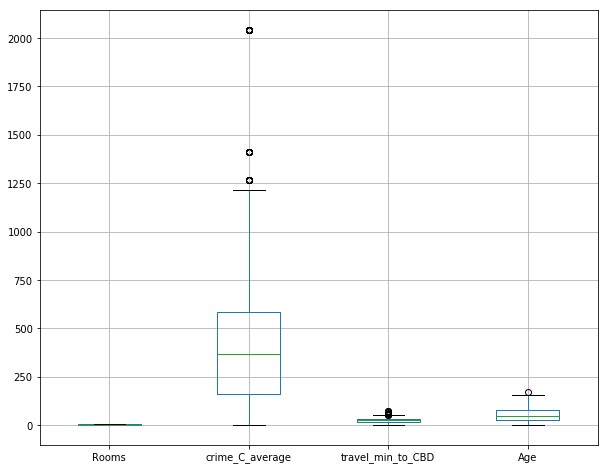

In [71]:
final_bigdata.boxplot(column=['Rooms','crime_C_average','travel_min_to_CBD','Age'],figsize=(10,8))

In [72]:
final_bigdata.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
0,ID737166057,17 View St,CANTERBURY,3725000.0,h,2017-05-13,3,2.0,2.0,857.0,...,0,3767.666667,18925.000000,2042.333333,Fintona Girls' School,0.594489,5,Fintona Girls' School,0.594489,not ranked
1,ID332105178,53 Purtell St,BENTLEIGH EAST,1307000.0,h,2016-08-13,3,2.0,4.0,684.0,...,0,925.666667,4701.333333,308.666667,Tucker Road Bentleigh Primary School,0.903456,380,Bentleigh Secondary College,0.439304,230
2,ID133555979,32 Matthews St,SUNSHINE,950000.0,h,2016-03-12,3,1.0,1.0,700.0,...,0,1363.666667,6287.666667,564.333333,Our Lady of the Immaculate Conception School,0.648849,not ranked,Sunshine College,1.100309,233
3,ID191896891,83 Cardigan St,CARLTON,840000.0,h,2016-08-10,2,1.0,0.0,66.0,...,0,97.666667,243.000000,33.000000,Carlton Gardens Primary School,0.550472,199,Academy of Mary Immaculate,0.890212,144
4,ID260050078,1/10 Wilton Gr,ELWOOD,1350000.0,t,2016-03-09,3,2.0,2.0,1170.0,...,0,1566.666667,8895.333333,491.000000,St Columba's School,0.110020,343,Elwood College,0.456676,175


In [73]:
linear_impute=LinearRegression()
linear_impute.fit(final_bigdata[['Rooms','Age','crime_C_average','travel_min_to_CBD']],final_bigdata[['Price']])
print('r-squared for this model = ',linear_impute.score(final_bigdata[['Rooms','Age','crime_C_average','travel_min_to_CBD']],final_bigdata[['Price']]))

r-squared for this model =  0.36636412686408304


In this task, different normalizations process which are 
- standardization
- minmax normalization
- log transformation 
- square root transformation 
- power transformation 

Above mentioned process are done for the age,rooms,crime_c_average and travel_min_to_CBD of propertys present in the dataframe

In [74]:
Age_list = list(final_bigdata['Age'])


In [75]:
age = pd.DataFrame()
age['Age']= Age_list
normalization_df = pd.DataFrame()

The price column in final dataframe is taken and converted as list which is sorted and stored in a differnet dataframe named as sorted_price.

In [76]:
normalization_df['minmax_age'] = preprocessing.MinMaxScaler().fit_transform(age[['Age']])[:,0]

- Minmax normalization is done by using the MinMaxScaler from preprocssing package
- The normalized values are stored in a spereate column named 'minmax_price' in normalization_df

In [77]:
normalization_df['std_age'] = preprocessing.StandardScaler().fit_transform(age[['Age']])[:,0]

- Standardization process is done by using the StandardScaler from preprocssing package
- The values obtained are stored in a spereate column named 'std_price' in normalization_df

In [78]:
def log_trans(row):
    return math.log(float(row['Age']))
normalization_df['log_age'] = age.apply(log_trans, axis =1)

- A seperate function is defined for log transformation, where log is taken for the price for each row by using log function from math package.
- Returned value is stored in a column named 'log_price' in the normalization_df

In [79]:
def pow_trans(row):
    return math.pow(float(row['Age']), 2)
normalization_df['pow_age'] = age.apply(pow_trans, axis = 1)

- A seperate function is defined for power transformation, where power is taken for the price for each row by using pow function from math package.
- Returned value is stored in a column named 'pow_price' in the normalization_df

In [80]:
def sqrt_trans(row):
    return math.sqrt(float(row['Age']))
normalization_df['sqrt_age'] = age.apply(sqrt_trans, axis = 1)

- A seperate function is defined for sqaure root transformation, where square root is taken for the price for each row by using sqrt function from math package.
- Returned value is stored in a column named 'sqrt_price' in the normalization_df

#### Normalization Plots

- All the columns in the normalization_df which has normalized price are plotted using seaborn package 

C:\Users\Keerthana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Square Root Normalization Plot')

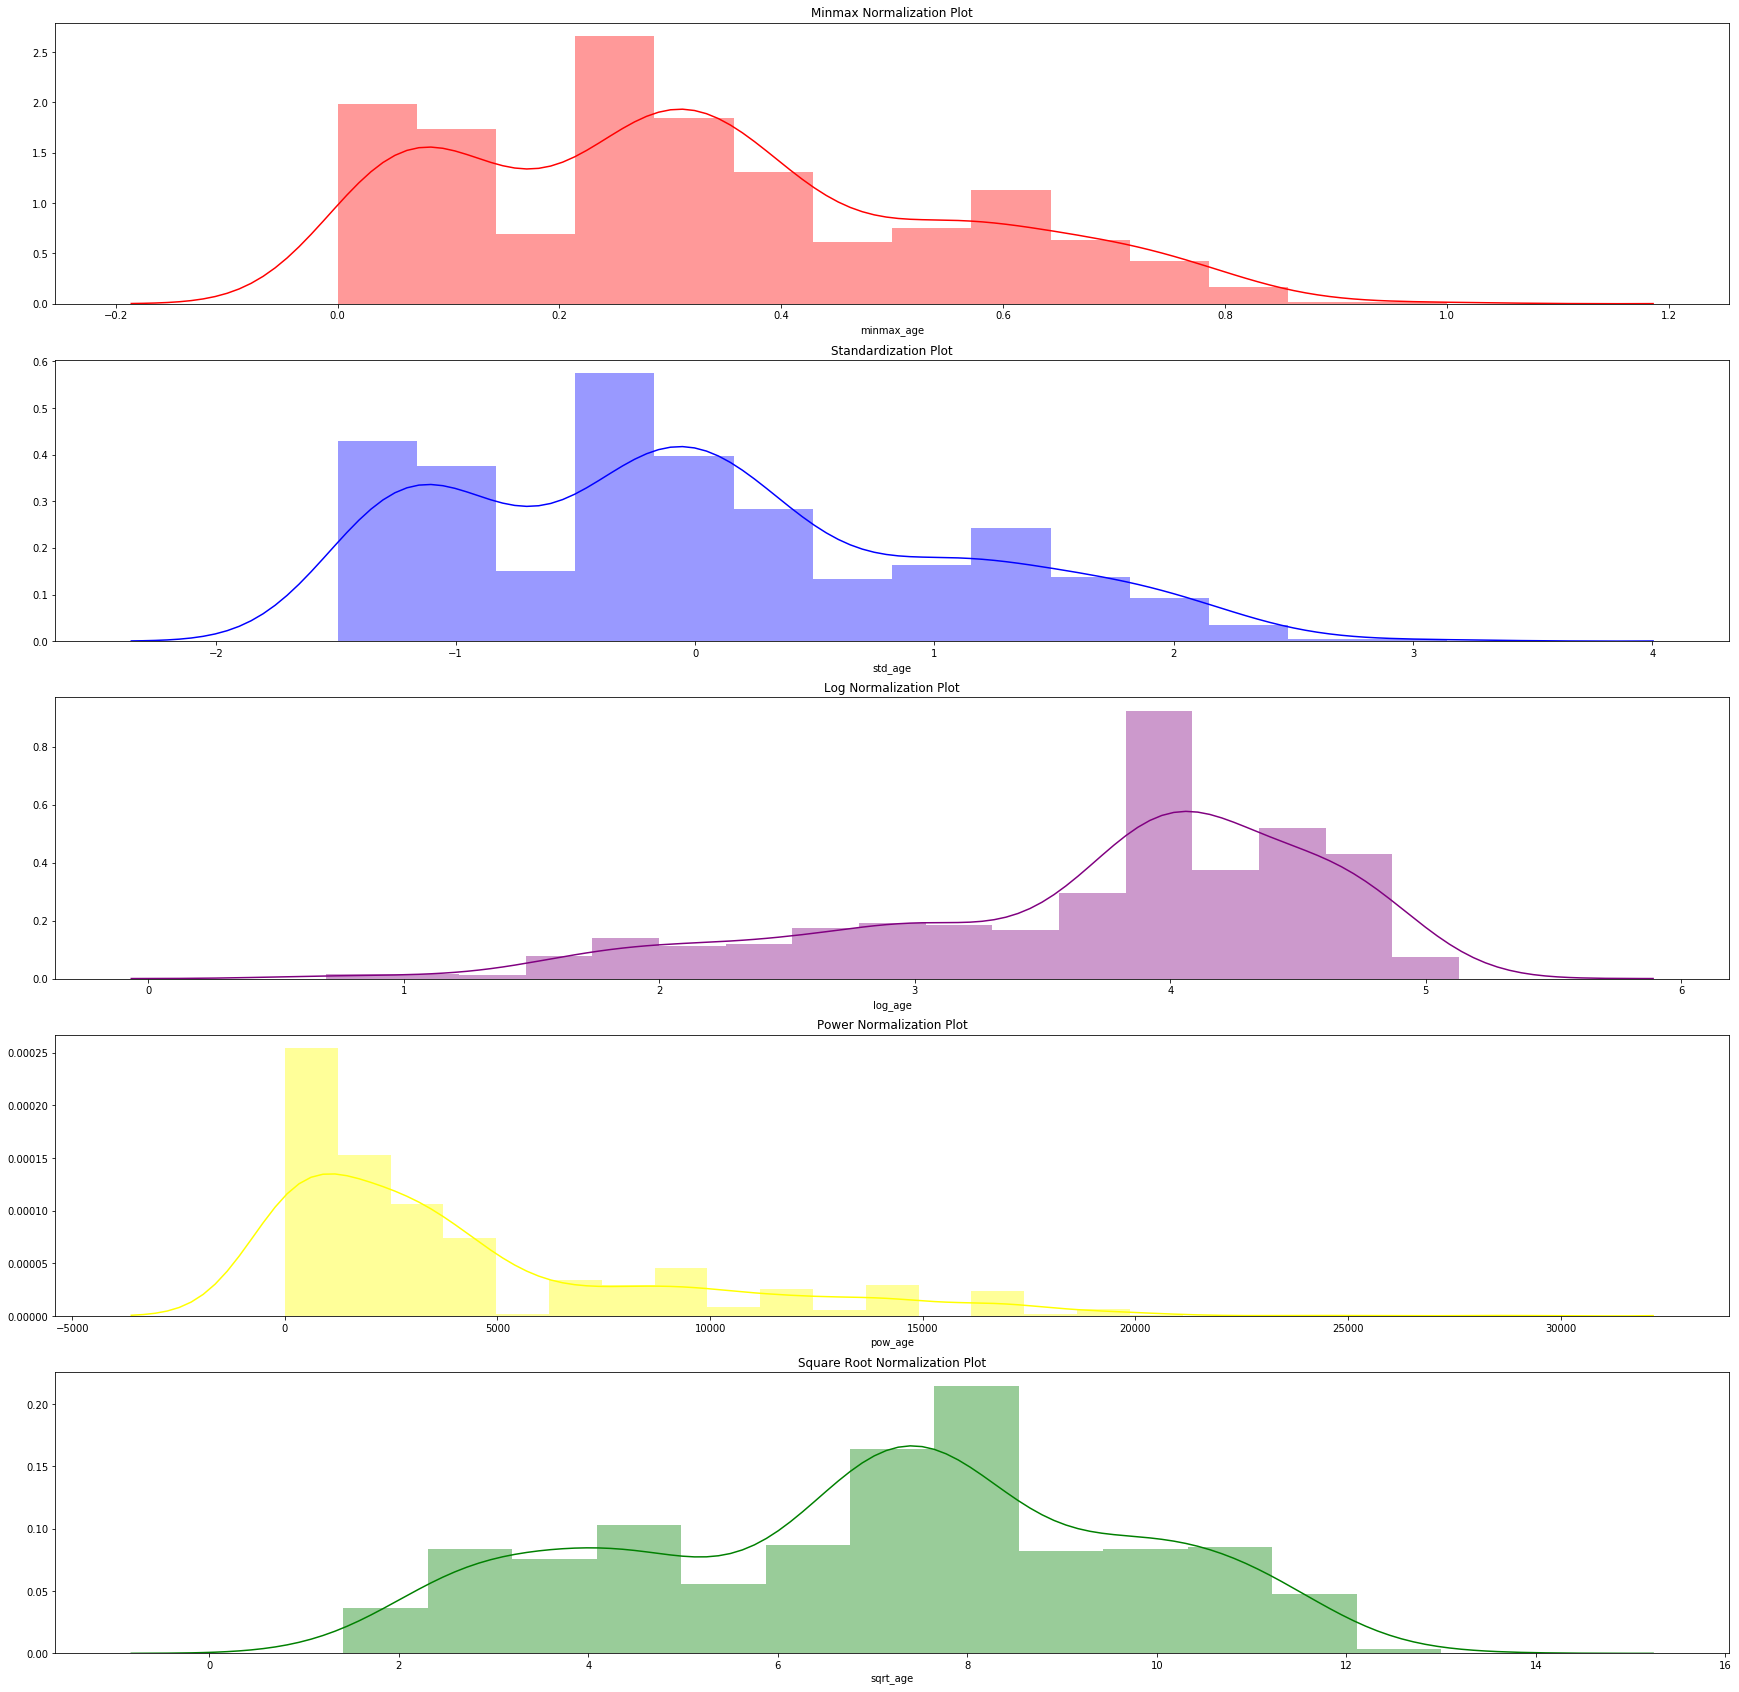

In [81]:
f, (ay1, ay2, ay3, ay4, ay5) = plt.subplots(5, figsize = (30,30))
sns.distplot(normalization_df['minmax_age'], hist=True,color="red",ax=ay1)
ay1.set_title('Minmax Normalization Plot')
sns.distplot(normalization_df['std_age'], hist=True,color="blue",ax=ay2)
ay2.set_title('Standardization Plot')
sns.distplot(normalization_df['log_age'], hist=True,color = 'purple',ax=ay3)
ay3.set_title('Log Normalization Plot')
sns.distplot(normalization_df['pow_age'], hist=True,color = 'yellow',ax=ay4)
ay4.set_title('Power Normalization Plot')
sns.distplot(normalization_df['sqrt_age'], hist=True,color = 'green',ax=ay5)
ay5.set_title('Square Root Normalization Plot')

#### Inference 

- From the plot above, we can observe that standarization, Minmax, power are positievly skewed
    - Since positive skewed has more number lower price than the average age of property
- The square root transformation of age tends to have bell shaped curve it is normally distributed
    - In the log plot, most of the age values are clustered in the centre of the plot 
    - Since the plot for log has a bell shaped curve, its symmetry is more suitable for models
    - Normally distributed data is more helpful for predicting and it is also useful for fixing the limit of quality

In [82]:
room_list = list(final_bigdata['Rooms'])
sorted_list = []
for i in range(len(room_list)):
    sorted_list.append(float(room_list[i]))
sorted_list.sort()

In [83]:
sorted_room = pd.DataFrame()
sorted_room['Rooms']= sorted_list
normalization_df = pd.DataFrame()

In [84]:
normalization_df['minmax_room'] = preprocessing.MinMaxScaler().fit_transform(sorted_room[['Rooms']])[:,0]
normalization_df['std_room'] = preprocessing.StandardScaler().fit_transform(sorted_room[['Rooms']])[:,0]
def log_trans(row):
    return math.log(float(row['Rooms']))
normalization_df['log_room'] = sorted_room.apply(log_trans, axis =1)
def pow_trans(row):
    return math.pow(float(row['Rooms']), 2)
normalization_df['pow_room'] = sorted_room.apply(pow_trans, axis = 1)
def sqrt_trans(row):
    return math.sqrt(float(row['Rooms']))
normalization_df['sqrt_room'] = sorted_room.apply(sqrt_trans, axis = 1)

C:\Users\Keerthana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Square Root Normalization Plot')

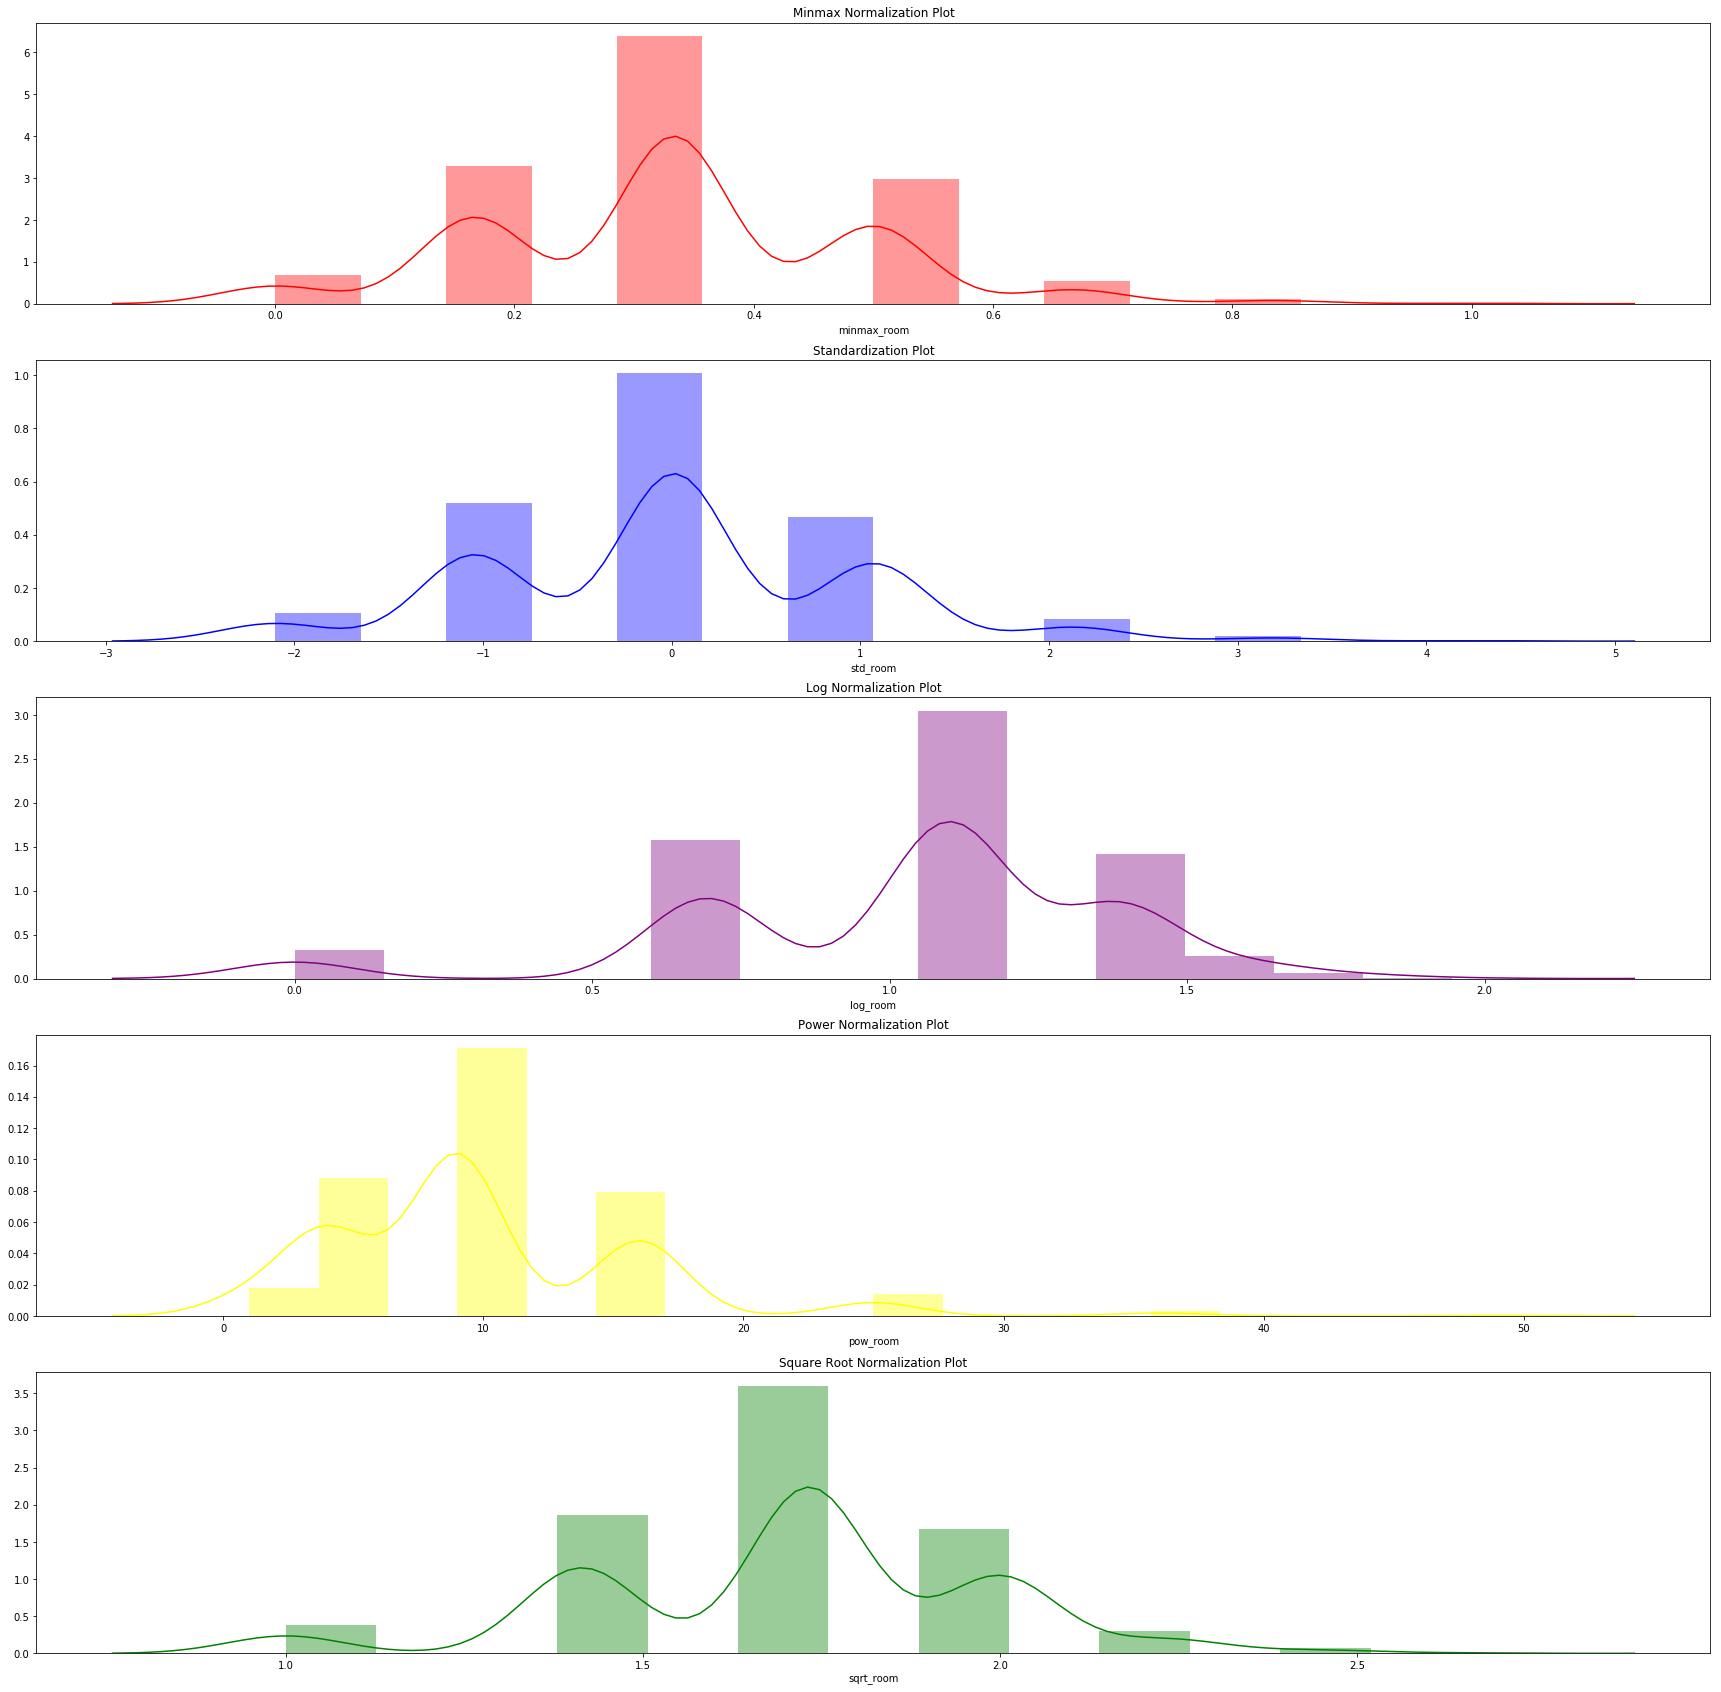

In [85]:
f, (ay1, ay2, ay3, ay4, ay5) = plt.subplots(5, figsize = (30,30))
sns.distplot(normalization_df['minmax_room'], hist=True,color="red",ax=ay1)
ay1.set_title('Minmax Normalization Plot')
sns.distplot(normalization_df['std_room'], hist=True,color="blue",ax=ay2)
ay2.set_title('Standardization Plot')
sns.distplot(normalization_df['log_room'], hist=True,color = 'purple',ax=ay3)
ay3.set_title('Log Normalization Plot')
sns.distplot(normalization_df['pow_room'], hist=True,color = 'yellow',ax=ay4)
ay4.set_title('Power Normalization Plot')
sns.distplot(normalization_df['sqrt_room'], hist=True,color = 'green',ax=ay5)
ay5.set_title('Square Root Normalization Plot')

In [86]:
crime_list = list(final_bigdata['crime_C_average'])
sorted_list = []
for i in range(len(crime_list)):
    sorted_list.append(float(crime_list[i]))
sorted_list.sort()

In [87]:
sorted_crime = pd.DataFrame()
sorted_crime['crime_C_average']= sorted_list
normalization_df = pd.DataFrame()

In [ ]:
normalization_df['minmax_crime'] = preprocessing.MinMaxScaler().fit_transform(sorted_crime[['crime_C_average']])[:,0]
normalization_df['std_crime'] = preprocessing.StandardScaler().fit_transform(sorted_crime[['crime_C_average']])[:,0]
def log_trans(row):
    return math.log(float(row['crime_C_average']))
normalization_df['log_crime'] = sorted_crime.apply(log_trans, axis =1)
def pow_trans(row):
    return math.pow(float(row['crime_C_average']), 2)
normalization_df['pow_crime'] = sorted_crime.apply(pow_trans, axis = 1)
def sqrt_trans(row):
    return math.sqrt(float(row['crime_C_average']))
normalization_df['sqrt_crime'] = sorted_crime.apply(sqrt_trans, axis = 1)

In [ ]:
f, (ay1, ay2, ay3, ay4, ay5) = plt.subplots(5, figsize = (30,30))
sns.distplot(normalization_df['minmax_crime'], hist=True,color="red",ax=ay1)
ay1.set_title('Minmax Normalization Plot')
sns.distplot(normalization_df['std_crime'], hist=True,color="blue",ax=ay2)
ay2.set_title('Standardization Plot')
sns.distplot(normalization_df['log_crime'], hist=True,color = 'purple',ax=ay3)
ay3.set_title('Log Normalization Plot')
sns.distplot(normalization_df['pow_crime'], hist=True,color = 'yellow',ax=ay4)
ay4.set_title('Power Normalization Plot')
sns.distplot(normalization_df['sqrt_crime'], hist=True,color = 'green',ax=ay5)
ay5.set_title('Square Root Normalization Plot')

In [ ]:
travel_list = list(final_bigdata['travel_min_to_CBD'])
sorted_list = []
for i in range(len(travel_list)):
    sorted_list.append(float(travel_list[i]))
sorted_list.sort()

In [ ]:
sorted_travel = pd.DataFrame()
sorted_travel['travel_min_to_CBD']= sorted_list
normalization_df = pd.DataFrame()

In [ ]:
normalization_df['minmax_travel'] = preprocessing.MinMaxScaler().fit_transform(sorted_travel[['travel_min_to_CBD']])[:,0]
normalization_df['std_travel'] = preprocessing.StandardScaler().fit_transform(sorted_travel[['travel_min_to_CBD']])[:,0]
# def log_trans(row):
#     return math.log(float(row['travel_min_to_CBD']))
# normalization_df['log_travel'] = sorted_travel.apply(log_trans, axis =1)
def pow_trans(row):
    return math.pow(float(row['travel_min_to_CBD']), 2)
normalization_df['pow_travel'] = sorted_travel.apply(pow_trans, axis = 1)
def sqrt_trans(row):
    return math.sqrt(float(row['travel_min_to_CBD']))
normalization_df['sqrt_travel'] = sorted_travel.apply(sqrt_trans, axis = 1)

In [ ]:
f, (ay1, ay2, ay3, ay4) = plt.subplots(4, figsize = (30,30))
sns.distplot(normalization_df['minmax_travel'], hist=True,color="red",ax=ay1)
ay1.set_title('Minmax Normalization Plot')
sns.distplot(normalization_df['std_travel'], hist=True,color="blue",ax=ay2)
ay2.set_title('Standardization Plot')
# sns.distplot(normalization_df['log_travel'], hist=True,color = 'purple',ax=ay3)
# ay3.set_title('Log Normalization Plot')
sns.distplot(normalization_df['pow_travel'], hist=True,color = 'yellow',ax=ay3)
ay3.set_title('Power Normalization Plot')
sns.distplot(normalization_df['sqrt_travel'], hist=True,color = 'green',ax=ay4)
ay4.set_title('Square Root Normalization Plot')

#### REFERENCES

- https://stackoverflow.com/questions/15968762/shapefile-and-matplotlib-plot-polygon-collection-of-shapefile-coordinates
- https://stackoverflow.com/questions/31542843/inpolygon-for-python-examples-of-matplotlib-path-path-contains-points-method
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
- https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
- https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
- https://thispointer.com/python-how-to-unzip-a-file-extract-single-multiple-or-all-files-from-a-zip-archive/
- https://stackoverflow.com/questions/28504494/python-is-not-none-returning-none
- https://stackoverflow.com/questions/40249941/python-pandas-datetimeindex
- https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
- https://stackoverflow.com/questions/42973256/apply-zip-function-on-pandas-dataframe-using-a-for-loop-argument
- https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c
- https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722